In [3]:
import pandas as pd

### Initialize Dataset

In [4]:
messages = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

In [5]:
messages.sample(4)

,label,message
3480,ham,Be sure to check your yahoo email. We sent pho...
1594,spam,PRIVATE! Your 2003 Account Statement for shows...
2793,ham,Well there's still a bit left if you guys want...
4230,ham,Have you bookedthe hut? And also your time off...


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
wordnet = WordNetLemmatizer()
content = []

### Pre-processing

In [8]:
for i in range(0, len(messages)):
    temp = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    temp = temp.lower()
    temp = temp.split()
    temp = [wordnet.lemmatize(word) for word in temp if not word in set(stopwords.words('english'))]
    temp = ' '.join(temp)
    content.append(temp)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer(max_features=4000)

In [11]:
X = cv.fit_transform(content).toarray()

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Encoding with Dummy Variables

In [13]:
y = pd.get_dummies(messages['label'])

In [14]:
y = y.iloc[:,1].values

In [15]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

### Modelling (Naive-Bayes)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [17]:
from sklearn.naive_bayes import MultinomialNB
spam_detection = MultinomialNB().fit(X_train,y_train)

In [18]:
y_pred = spam_detection.predict(X_test)

### Metrics

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [20]:
cm

array([[946,   9],
       [  9, 151]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
acc = accuracy_score(y_test,y_pred)
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
acc, pre, rec

(0.9838565022421525, 0.94375, 0.94375)

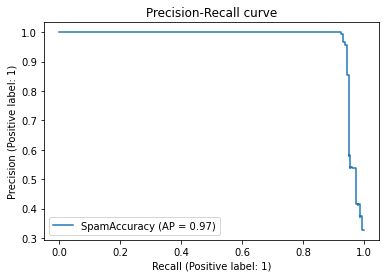

In [24]:
import matplotlib
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    spam_detection, X_test, y_test, name="SpamAccuracy"
)
_ = display.ax_.set_title("Precision-Recall curve")

#### Metrics can be further improved by tweaking features during pre-processing and semantic enhancement.